## Завдання:    
До пункту видачі надійшли вироби з такими характеристиками:
Всього виробів – 13000 одиниць, з них виготовлено на першому заводі — 8000 од., вагою 13 кг., зі стандартним відхиленням по вазі 0.5 кг.. На другому — 5000 од., вагою 12 кг., зі стандартним відхиленням по вазі 0.7 кг. Доля якісних виробів, вироблених на першому заводі, становить 0.85. Доля якісних виробів, вироблених на другому заводі 0,8.


Написати код, з використанням EM-алгоритму, для визначення ймовірності, на якому заводі був вироблений виріб.


In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import random 

#### Генерація даних згідно умови задачи.

In [18]:
x1 = np.random.normal(loc=13, scale=0.5, size=8000)
x2 = np.random.normal(loc=12, scale=0.7, size=5000)
x = np.concatenate((x1, x2))
np.random.shuffle(x)


#### Візуалізація одновимірних даних.

Text(0, 0.5, 'Weight')

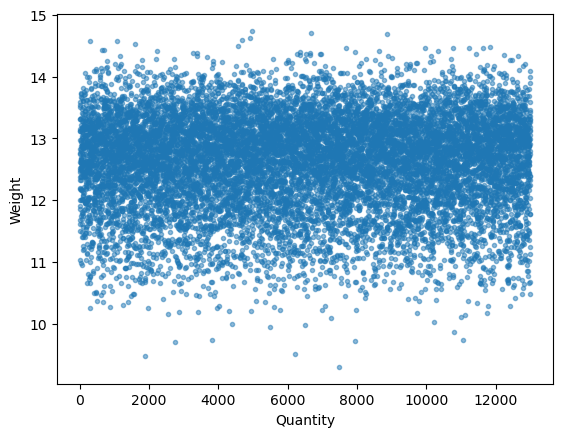

In [19]:
plt.scatter(range(len(x)), x, marker='.', alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Weight')

#### Застосування ЕМ-алгоритму кластеризації.

In [20]:
x = x.reshape(-1, 1)
gmm = GaussianMixture(n_components=2).fit(x)

In [21]:
centers = gmm.means_.reshape(-1, 1)
print(centers)

[[13.01120068]
 [11.90795699]]


In [22]:
pr = gmm.predict(x)
x1 = x[pr == 0]
x2 = x[pr == 1]

In [23]:
# create additional x2_add array for visualization
add = np.array([np.nan]*(len(x1)-len(x2))).reshape(-1, 1)
x2_add = np.concatenate((x2, add))
np.random.shuffle(x2_add)

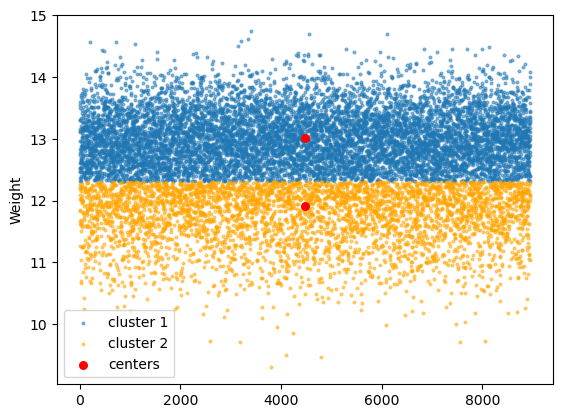

In [24]:
plt.scatter(range(len(x1)), x1, marker='.', alpha=0.5, s =15, label='cluster 1')
plt.scatter(range(len(x2_add)), x2_add, marker='.', s=15, c='orange', alpha=0.5, label='cluster 2')
plt.scatter( len(x1)/2, centers[0], c='red', s = 30, label="centers")
plt.scatter( len(x2_add)/2, centers[1], c='red', s = 30)
plt.ylabel('Weight')
plt.legend()

Як видно, розмірність кластерів однакова, але щільність розподілу значень у першому кластері вище ніж у другому.

#### Результати кластеризації.

In [25]:
pr = gmm.predict(x)
print(f'Кількість значень у 1-му кластері: {len(x1)}')
print(f'Ймовірність, що деталь виготовлена на 1-му заводі: {len(x1)/len(pr):.4f}')
print(f'Кількість значень у 2-му кластері: {len(x2)}')
print(f'Ймовірність, що деталь виготовлена на 2-му заводі: {len(x2)/len(pr):.4f}')

Кількість значень у 1-му кластері: 8958
Ймовірність, що деталь виготовлена на 1-му заводі: 0.6891
Кількість значень у 2-му кластері: 4042
Ймовірність, що деталь виготовлена на 2-му заводі: 0.3109


### Висновок:
Алгоритм достатньо точно визначив центри кластерів: 11.9 і 13.0. Але при визначенні належності елементів певному кластеру допускає деяку похибку.  
Насправді, ймовірність, що деталь вироблено на 1-му заводі дорівнює 8/13 = 0.62, а на другому 5/13 = 0.38.  
Ця похибка пов'язана з тим, що значення плотно перетинаються між 12 і 13. Тому алгоритм не дуже точно визначив кількість елементів по кластерах.